# KMeans Clustering  

KMeans Clustering comes in handy when you want to group things together based on the similar qualities they share. 

In this dataset, each row represents a customer who has certain qualities like Annual Income and Spending Score. In this notebook we will not be using sklearn. Instead we will code the steps involved in Clustering and visualise what's happenning.


# Main Concept

Two data points (or two customers) are considered similar if they are closer together in mathematical space. We can use Euclidean distance as the formula to measure this distance.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Import Dataset

In [3]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in the dataset.

In [7]:
df.drop(['CustomerID','Gender'], axis = 1, inplace = True)

KeyError: "['CustomerID' 'Gender'] not found in axis"

In [8]:
# Let's clean up some of the columns names

df.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace = True)

In [9]:
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Scale the Data

KMeans clustering is super-senstive to the scale of the data. We use standard scalar to bring all features to have mean 0 and standard deviation 1.

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df), columns = df.columns)
df_scaled.head()

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Plotting the data

Let's see how our data looks like. Since we have 3 features we can imagine our data is in a cube and we are looking straight at the data from different faces of the cube. 

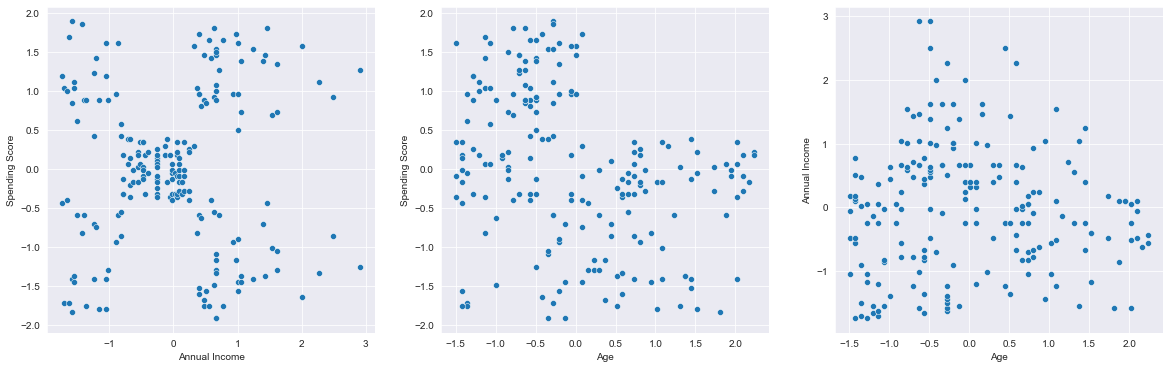

In [11]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income')

plt.show()

We can see possibles clusters in the plot of annual income vs spending score. So that's a good sign.

In most cases you will have much more than 3 features and it won't be so easy to spot these clusters in 2D graphs.

# Build the model

## Choose a value for K

In [12]:
# The number of clusters
K = 5

## Random Initialisation of Centroids

We choose random points from the data for the centroid of each cluster.

It's important to note that, random initialization is not an efficient way of starting out as sometimes since we often have to do more clustering iterations to reach good clusters. So it leads to a greater overall runtime and a less-efficient algorithm overall.

To overcome this sklearn uses Kmeans++ that does a kind of "smart initialisation".

In [13]:
centroids = df_scaled.sample(5, random_state = 10)
centroids 

,Age,Annual Income,Spending Score
59,1.015499,-0.555747,-0.163051
5,-1.209269,-1.662660,1.001596
20,-0.276302,-1.395474,-0.590088
198,-0.491602,2.917671,-1.250054
52,-0.563369,-0.670255,0.147522


Here are the coordinates of our randomly chosen centroids. Let's plot them.

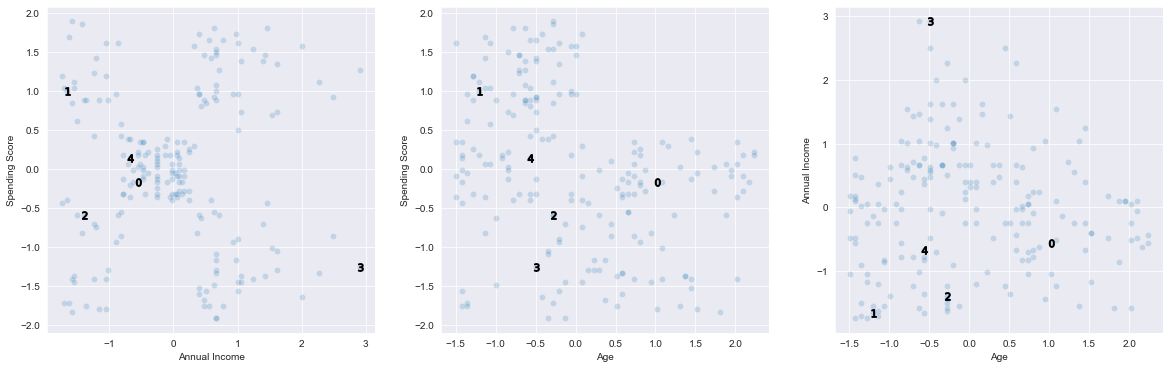

In [14]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 0.2)

for i in range(5):
    plt.scatter(x = centroids['Annual Income'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=60,color = 'Black')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 0.2)

for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=60,color = 'Black')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 0.2)

for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Annual Income'].iloc[i], marker = '$%d$' %(i), s=60,color = 'Black')

plt.show()

If we look at the first plot on the left, the random centroids seem to be way off from being good centroids. 

## Find the distance between the Centroid and all other data points

We compute the Euclidian distance between all points and the centroid of each cluster.

In [15]:
from scipy.spatial.distance import cdist

In [16]:
# cdist returns the distance of each point from the centroid

distances = pd.DataFrame(cdist(df_scaled, centroids,'euclidean'), columns = ['Distance From C1','Distance From C2',
                                                                     'Distance From C3','Distance From C4',
                                                                     'Distance From C5'])

In [17]:
distances.head()

,Distance From C1,Distance From C2,Distance From C3,Distance From C4,Distance From C5
0,2.725411,1.454448,1.208570,4.818677,1.490966
1,2.918967,0.220581,2.077631,5.318789,1.660104
2,3.054741,2.721565,1.587318,4.721148,2.271052
3,2.719368,0.090080,1.869079,5.195575,1.479519
4,1.942250,1.539612,0.437577,4.659832,1.131487


## Assign cluster labels to each point

We assign the label to each point based on whichever centroid it is closest to.

In [18]:
cluster_labels = pd.Series(np.argmin(distances.values, axis = 1))

# displaying labels assigned to the first five rows
cluster_labels.head()

0    2
1    1
2    2
3    1
4    2
dtype: int64

## Visualising these clusters

In [19]:
import matplotlib.cm as cm

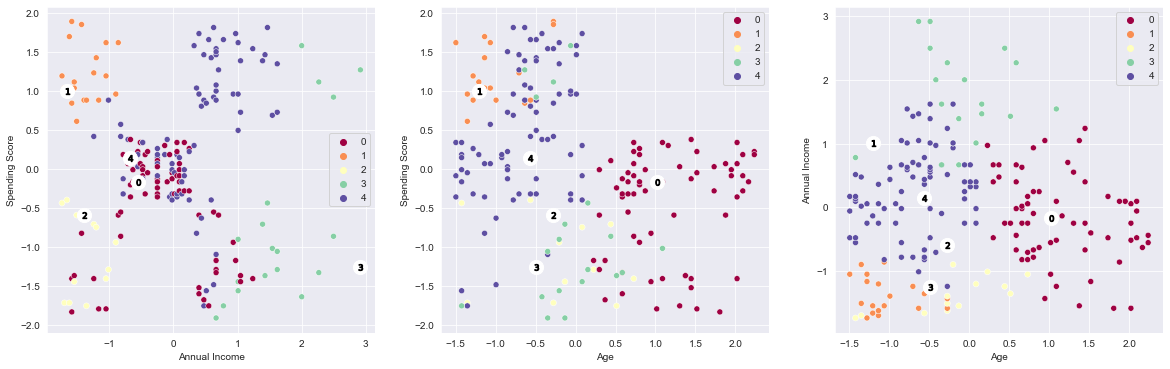

In [20]:

plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral' )

for i in range(5):
    plt.scatter(x = centroids['Annual Income'].iloc[i], y = centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = centroids['Annual Income'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = centroids['Age'].iloc[i], y = centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()

Again look at the leftmost plot. We see it clearly. The centroids are not optimal representations of the centre of the cluster. The centroid of cluster 4 is quite far from most of it's data points.

# Update the centroid and identify the new clusters

To find the new centroid, compute the arithmetic mean of the points for each dimension.

In [21]:
new_centroids = []

for i in range(K):
    new_centroids.append(list(df_scaled[cluster_labels == i].mean().values))
    
new_centroids = pd.DataFrame(new_centroids, columns = df_scaled.columns, index = ['C1', 'C2','C3','C4','C5'])
new_centroids

,Age,Annual Income,Spending Score
C1,1.151644,-0.176298,-0.465059
C2,-1.024186,-1.377394,1.212050
C3,-0.193494,-1.380794,-1.055946
C4,-0.107650,1.679073,-0.776431
C5,-0.677298,0.281595,0.473138


Let us visualise these new centroids.

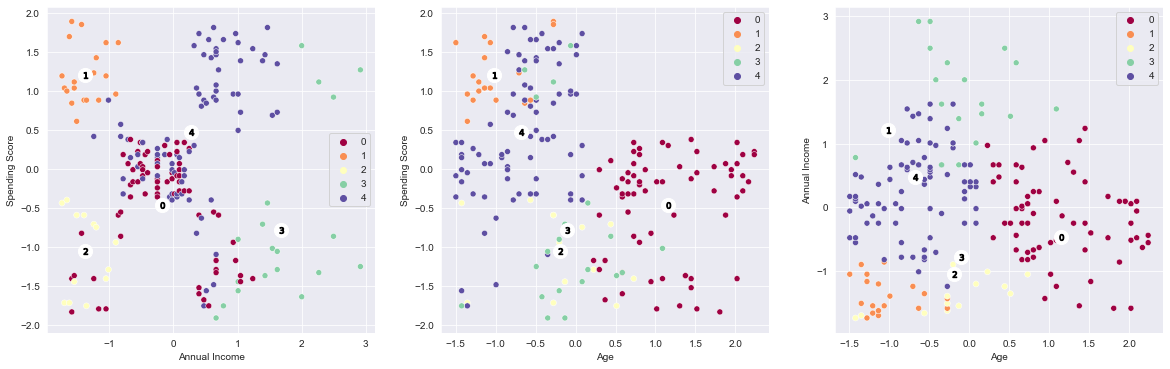

In [22]:

plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral' )

for i in range(5):
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()

We now create new clusters based on these centroids. Centroid 4 has moved towards the points in its cluster. Also Centroid 3 has also made a move towards the centre of its own cluster.

Now let's give all the datapoints (or customers) new labels based on the new cluster centroids.

In [23]:
# cdist returns the distance of each point from the centroid

new_distances = pd.DataFrame(cdist(df_scaled, new_centroids,'euclidean'), columns = ['Distance From C1','Distance From C2',
                                                                     'Distance From C3','Distance From C4',
                                                                     'Distance From C5'])

In [24]:
new_distances.head()

,Distance From C1,Distance From C2,Distance From C3,Distance From C4,Distance From C5
0,3.013275,1.732970,1.424667,3.678886,2.337855
1,3.334382,0.443843,2.526062,4.116961,2.229215
2,3.187645,2.964046,1.371851,3.722469,3.029564
3,3.135419,0.383287,2.321275,3.973069,2.112724
4,2.270532,1.696906,0.807349,3.394054,2.132715


Assign each datapoint to the nearest cluster

In [25]:
new_cluster_labels = pd.Series(np.argmin(new_distances.values, axis = 1))

# displaying labels assigned to the first five rows
new_cluster_labels.head()

0    2
1    1
2    2
3    1
4    2
dtype: int64

Visualising the new clusters.

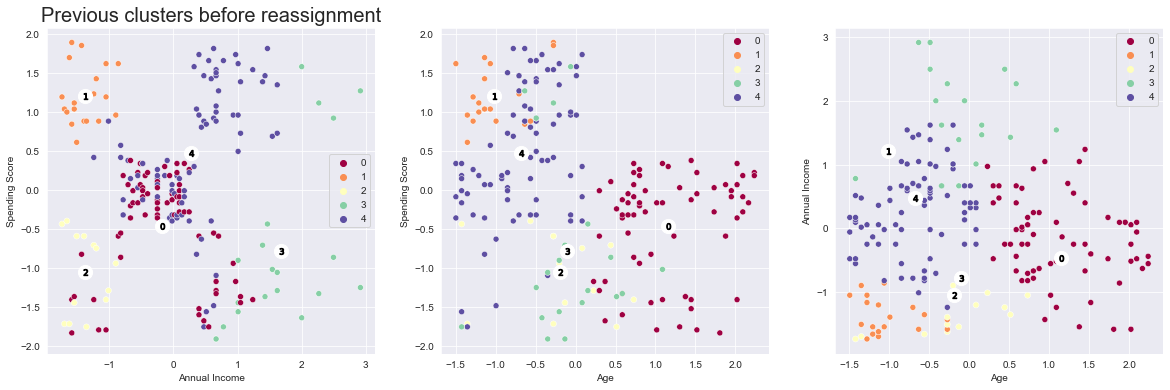

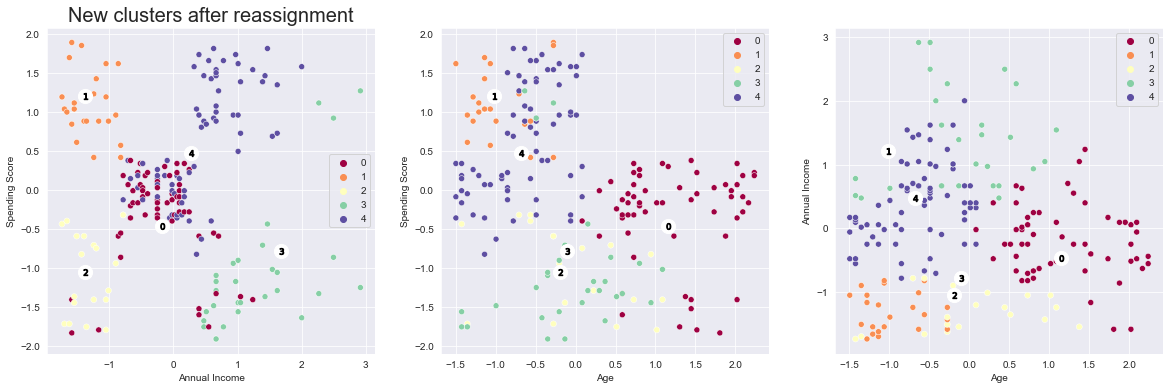

In [26]:

plt.figure(figsize = (20,6))


plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral' )

for i in range(5):
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.title('Previous clusters before reassignment', fontdict = {'fontsize' : 20})        
    
plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()


plt.figure(figsize = (20,6))

plt.subplot(1,3,1)

sns.scatterplot(data = df_scaled, x = 'Annual Income', y = 'Spending Score', alpha = 1,hue = new_cluster_labels, palette='Spectral' )

plt.title('New clusters after reassignment', fontdict = {'fontsize' : 20})     

for i in range(5):
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Annual Income'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'black')

plt.subplot(1,3,2)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Spending Score', alpha = 1,hue = new_cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40, color = 'Black')

    

plt.subplot(1,3,3)

sns.scatterplot(data = df_scaled, x = 'Age', y = 'Annual Income', alpha = 1,hue = new_cluster_labels, palette='Spectral')

for i in range(5):
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], s=200, color = 'White')
    plt.scatter(x = new_centroids['Age'].iloc[i], y = new_centroids['Spending Score'].iloc[i], marker = '$%d$' %(i), s=40,color = 'Black')

plt.show()

On comparing the plots we can see that clusters 1, 2 and 3 have grown slightly larger. It's a subtle difference but its there. Look carefully at the left most plot.

To make it clearer, lets visualise this shift in cluster size with bar plots.

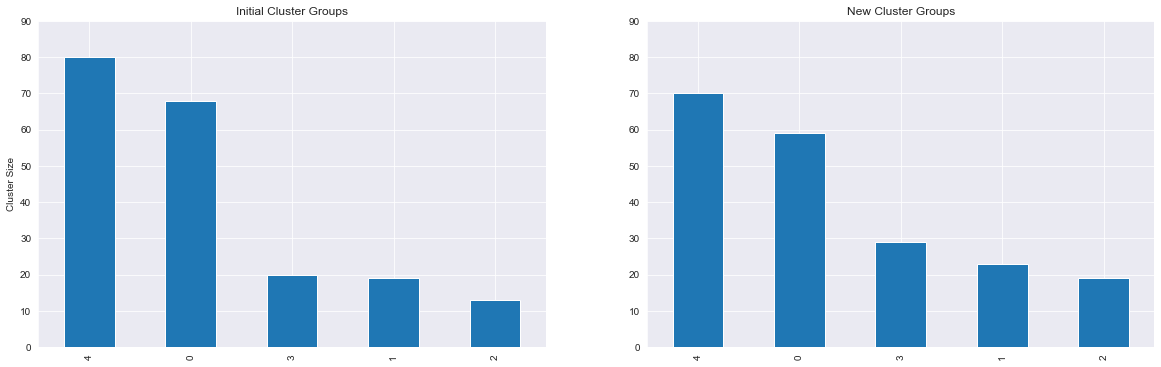

In [27]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

plt.title('Initial Cluster Groups')

plt.ylabel('Cluster Size')

plt.ylim(0,90)

cluster_labels.value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)

plt.title('New Cluster Groups')

plt.ylim(0,90)

new_cluster_labels.value_counts().plot(kind = 'bar')

plt.show()

Cluster  4 and 0 remain the largest clusters while 1,2 and 3 have increased in size.